In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from utils import columns

In [5]:
df = pd.read_csv('../data/united_oats.csv', index_col=0)

In [6]:
X = df.dropna().drop('Oat_Yield', axis=1)
y = df.dropna()['Oat_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-1.197956337374064e+21

In [8]:
mean_squared_error(y_test, reg.predict(X_test))

2.053597202053542e+23

In [9]:
cross_val_score(reg, X, y, cv=5).mean()

-2.880838695516533e+24

In [10]:
y = df['Oat_Yield']
X = df.drop(columns=['Oat_Yield'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [12]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [13]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

145.34831128995063

In [14]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.8515785868033359

In [15]:
cross_val_score(reg, X, y, cv=5).mean()

0.47008809899705445

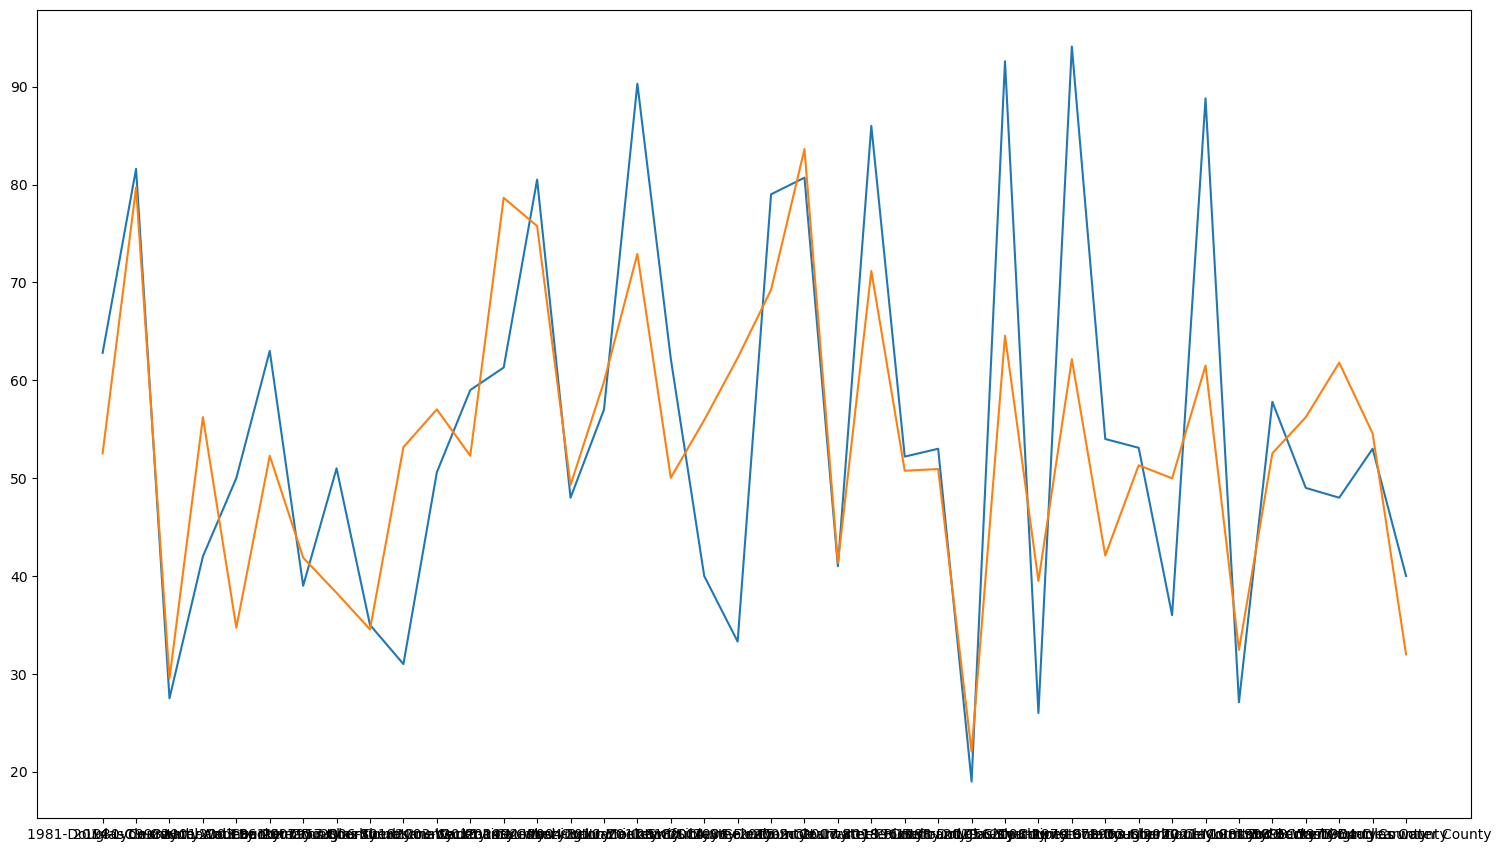

In [16]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [18]:
from lightgbm import LGBMRegressor, plot_importance

In [19]:
reg = LGBMRegressor().fit(X_train, y_train)

In [20]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

146.52168193907852

In [21]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.8508986569827889

In [22]:
fi = reg.feature_importances_
np.argwhere(fi > 15)
columns[np.argwhere(fi > 10)]

array([['01-21-avg'],
       ['01-28-min'],
       ['02-10-avg'],
       ['02-15-max'],
       ['03-07-min'],
       ['03-10-avg'],
       ['04-12-avg'],
       ['04-15-min'],
       ['04-17-min'],
       ['05-26-min'],
       ['05-30-max'],
       ['06-19-min'],
       ['07-07-max'],
       ['07-24-min'],
       ['07-26-max'],
       ['08-09-min'],
       ['09-08-min'],
       ['09-12-avg'],
       ['09-12-min'],
       ['09-13-min'],
       ['09-13-max'],
       ['09-15-avg'],
       ['09-16-avg'],
       ['09-21-max'],
       ['09-23-avg'],
       ['09-23-max'],
       ['09-24-min'],
       ['09-28-min']], dtype='<U10')

In [23]:
cross_val_score(reg, X, y, cv=5).mean()

0.4838700998733767

In [24]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([55.65504535, 40.34790469, 54.81078882, 58.11712281, 52.09356344,
       46.36535028, 54.48957916, 51.1139742 , 46.3380958 , 63.81940198,
       69.94063453, 55.35914837, 54.32136007, 53.30873938, 57.26291504,
       45.03311344, 44.84098699])

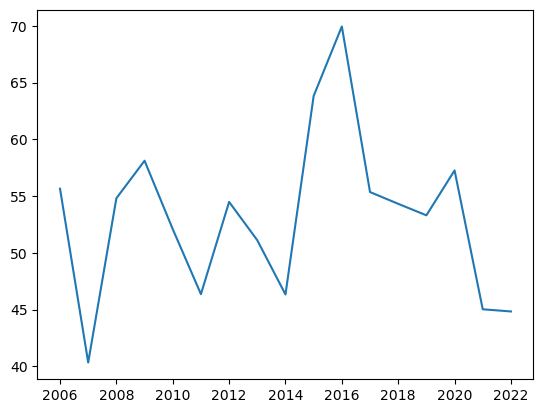

In [25]:
plt.plot( range(2006,2023), res)

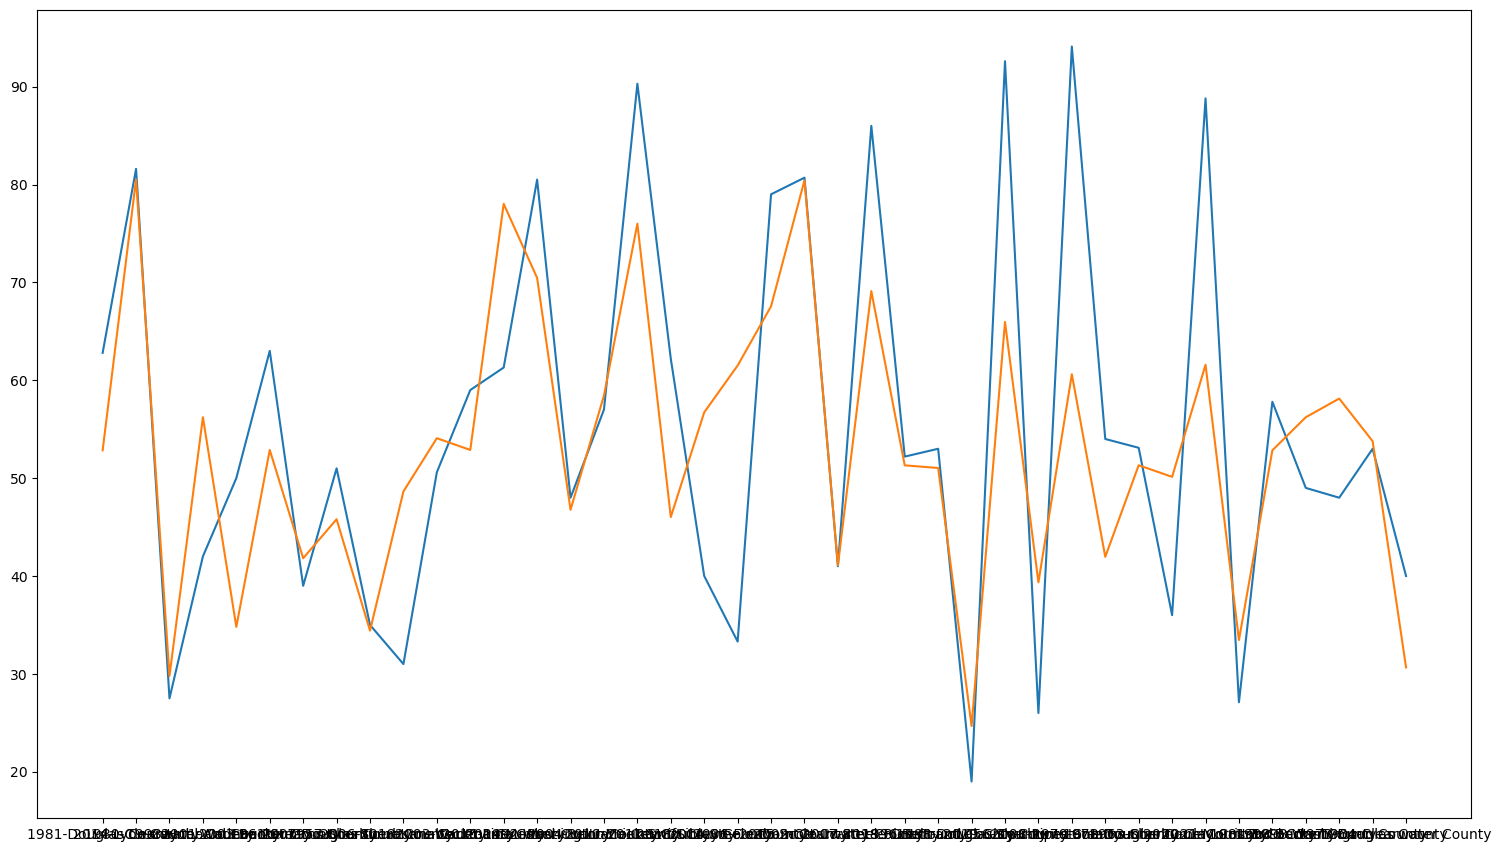

In [26]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [28]:
from catboost import CatBoostRegressor

In [29]:
reg = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.038898
0:	learn: 17.6753805	total: 195ms	remaining: 3m 14s
1:	learn: 17.4881250	total: 232ms	remaining: 1m 55s
2:	learn: 17.2788736	total: 264ms	remaining: 1m 27s
3:	learn: 17.0482407	total: 297ms	remaining: 1m 13s
4:	learn: 16.8279119	total: 330ms	remaining: 1m 5s
5:	learn: 16.6581944	total: 372ms	remaining: 1m 1s
6:	learn: 16.4601968	total: 404ms	remaining: 57.3s
7:	learn: 16.2876152	total: 438ms	remaining: 54.3s
8:	learn: 16.1226389	total: 474ms	remaining: 52.2s
9:	learn: 15.9368655	total: 513ms	remaining: 50.8s
10:	learn: 15.7723530	total: 547ms	remaining: 49.1s
11:	learn: 15.6092281	total: 579ms	remaining: 47.7s
12:	learn: 15.4565928	total: 612ms	remaining: 46.5s
13:	learn: 15.3209544	total: 645ms	remaining: 45.4s
14:	learn: 15.1560364	total: 680ms	remaining: 44.6s
15:	learn: 15.0034628	total: 723ms	remaining: 44.5s
16:	learn: 14.8477602	total: 764ms	remaining: 44.2s
17:	learn: 14.6889044	total: 798ms	remaining: 43.6s
18:	learn: 14.5587425	total: 834ms	remai

159:	learn: 8.1202704	total: 6.43s	remaining: 33.7s
160:	learn: 8.1143163	total: 6.46s	remaining: 33.7s
161:	learn: 8.0892262	total: 6.5s	remaining: 33.6s
162:	learn: 8.0779097	total: 6.53s	remaining: 33.6s
163:	learn: 8.0549820	total: 6.57s	remaining: 33.5s
164:	learn: 8.0370593	total: 6.6s	remaining: 33.4s
165:	learn: 8.0206712	total: 6.64s	remaining: 33.3s
166:	learn: 8.0030908	total: 6.68s	remaining: 33.3s
167:	learn: 7.9885281	total: 6.71s	remaining: 33.2s
168:	learn: 7.9643101	total: 6.75s	remaining: 33.2s
169:	learn: 7.9523443	total: 6.8s	remaining: 33.2s
170:	learn: 7.9337788	total: 6.84s	remaining: 33.2s
171:	learn: 7.9177468	total: 6.88s	remaining: 33.1s
172:	learn: 7.8950241	total: 6.92s	remaining: 33.1s
173:	learn: 7.8778383	total: 6.96s	remaining: 33s
174:	learn: 7.8510367	total: 6.99s	remaining: 33s
175:	learn: 7.8416264	total: 7.03s	remaining: 32.9s
176:	learn: 7.8111564	total: 7.06s	remaining: 32.8s
177:	learn: 7.7870900	total: 7.11s	remaining: 32.8s
178:	learn: 7.76334

321:	learn: 5.7202836	total: 11.9s	remaining: 25.1s
322:	learn: 5.7122881	total: 11.9s	remaining: 25s
323:	learn: 5.6974940	total: 12s	remaining: 25s
324:	learn: 5.6878574	total: 12s	remaining: 24.9s
325:	learn: 5.6757663	total: 12s	remaining: 24.9s
326:	learn: 5.6652032	total: 12.1s	remaining: 24.9s
327:	learn: 5.6565917	total: 12.1s	remaining: 24.8s
328:	learn: 5.6464300	total: 12.2s	remaining: 24.8s
329:	learn: 5.6378877	total: 12.2s	remaining: 24.8s
330:	learn: 5.6350158	total: 12.2s	remaining: 24.7s
331:	learn: 5.6266931	total: 12.3s	remaining: 24.7s
332:	learn: 5.6127300	total: 12.3s	remaining: 24.7s
333:	learn: 5.6019928	total: 12.4s	remaining: 24.6s
334:	learn: 5.5865215	total: 12.4s	remaining: 24.6s
335:	learn: 5.5695568	total: 12.4s	remaining: 24.6s
336:	learn: 5.5560240	total: 12.5s	remaining: 24.6s
337:	learn: 5.5432456	total: 12.5s	remaining: 24.5s
338:	learn: 5.5401924	total: 12.6s	remaining: 24.5s
339:	learn: 5.5307210	total: 12.6s	remaining: 24.5s
340:	learn: 5.5289040	

484:	learn: 4.5826887	total: 18.3s	remaining: 19.4s
485:	learn: 4.5769949	total: 18.3s	remaining: 19.3s
486:	learn: 4.5743992	total: 18.3s	remaining: 19.3s
487:	learn: 4.5686896	total: 18.4s	remaining: 19.3s
488:	learn: 4.5636687	total: 18.4s	remaining: 19.3s
489:	learn: 4.5578604	total: 18.5s	remaining: 19.2s
490:	learn: 4.5560536	total: 18.5s	remaining: 19.2s
491:	learn: 4.5500500	total: 18.6s	remaining: 19.2s
492:	learn: 4.5447711	total: 18.6s	remaining: 19.1s
493:	learn: 4.5365933	total: 18.6s	remaining: 19.1s
494:	learn: 4.5353273	total: 18.7s	remaining: 19s
495:	learn: 4.5343823	total: 18.7s	remaining: 19s
496:	learn: 4.5256615	total: 18.8s	remaining: 19s
497:	learn: 4.5176290	total: 18.8s	remaining: 19s
498:	learn: 4.5162156	total: 18.8s	remaining: 18.9s
499:	learn: 4.5093445	total: 18.9s	remaining: 18.9s
500:	learn: 4.5068217	total: 18.9s	remaining: 18.8s
501:	learn: 4.5052520	total: 19s	remaining: 18.8s
502:	learn: 4.5043725	total: 19s	remaining: 18.8s
503:	learn: 4.4962926	to

646:	learn: 4.0297200	total: 24.5s	remaining: 13.4s
647:	learn: 4.0288914	total: 24.5s	remaining: 13.3s
648:	learn: 4.0268781	total: 24.6s	remaining: 13.3s
649:	learn: 4.0264299	total: 24.6s	remaining: 13.3s
650:	learn: 4.0230643	total: 24.6s	remaining: 13.2s
651:	learn: 4.0222756	total: 24.7s	remaining: 13.2s
652:	learn: 4.0197942	total: 24.7s	remaining: 13.1s
653:	learn: 4.0162923	total: 24.7s	remaining: 13.1s
654:	learn: 4.0131089	total: 24.8s	remaining: 13.1s
655:	learn: 4.0099902	total: 24.8s	remaining: 13s
656:	learn: 4.0095337	total: 24.9s	remaining: 13s
657:	learn: 4.0091837	total: 24.9s	remaining: 12.9s
658:	learn: 4.0045111	total: 24.9s	remaining: 12.9s
659:	learn: 4.0029040	total: 25s	remaining: 12.9s
660:	learn: 4.0023721	total: 25s	remaining: 12.8s
661:	learn: 4.0017293	total: 25s	remaining: 12.8s
662:	learn: 3.9978199	total: 25.1s	remaining: 12.7s
663:	learn: 3.9975307	total: 25.1s	remaining: 12.7s
664:	learn: 3.9968578	total: 25.1s	remaining: 12.7s
665:	learn: 3.9951654	

808:	learn: 3.7346946	total: 30.6s	remaining: 7.23s
809:	learn: 3.7337898	total: 30.7s	remaining: 7.19s
810:	learn: 3.7320766	total: 30.7s	remaining: 7.15s
811:	learn: 3.7305842	total: 30.7s	remaining: 7.12s
812:	learn: 3.7278069	total: 30.8s	remaining: 7.08s
813:	learn: 3.7266128	total: 30.8s	remaining: 7.04s
814:	learn: 3.7245511	total: 30.8s	remaining: 7s
815:	learn: 3.7243584	total: 30.9s	remaining: 6.96s
816:	learn: 3.7242030	total: 30.9s	remaining: 6.92s
817:	learn: 3.7225996	total: 31s	remaining: 6.89s
818:	learn: 3.7202476	total: 31s	remaining: 6.85s
819:	learn: 3.7194289	total: 31s	remaining: 6.81s
820:	learn: 3.7189914	total: 31.1s	remaining: 6.77s
821:	learn: 3.7172753	total: 31.1s	remaining: 6.73s
822:	learn: 3.7170170	total: 31.1s	remaining: 6.69s
823:	learn: 3.7145415	total: 31.2s	remaining: 6.66s
824:	learn: 3.7137388	total: 31.2s	remaining: 6.62s
825:	learn: 3.7117229	total: 31.2s	remaining: 6.58s
826:	learn: 3.7114543	total: 31.3s	remaining: 6.54s
827:	learn: 3.7102044

969:	learn: 3.5700544	total: 36.5s	remaining: 1.13s
970:	learn: 3.5691162	total: 36.5s	remaining: 1.09s
971:	learn: 3.5678883	total: 36.6s	remaining: 1.05s
972:	learn: 3.5666748	total: 36.6s	remaining: 1.02s
973:	learn: 3.5661461	total: 36.7s	remaining: 978ms
974:	learn: 3.5650136	total: 36.7s	remaining: 941ms
975:	learn: 3.5648807	total: 36.7s	remaining: 904ms
976:	learn: 3.5633733	total: 36.8s	remaining: 866ms
977:	learn: 3.5624383	total: 36.8s	remaining: 829ms
978:	learn: 3.5616550	total: 36.9s	remaining: 791ms
979:	learn: 3.5609267	total: 36.9s	remaining: 753ms
980:	learn: 3.5604827	total: 36.9s	remaining: 716ms
981:	learn: 3.5599068	total: 37s	remaining: 678ms
982:	learn: 3.5590523	total: 37s	remaining: 641ms
983:	learn: 3.5589381	total: 37.1s	remaining: 603ms
984:	learn: 3.5574512	total: 37.1s	remaining: 565ms
985:	learn: 3.5573198	total: 37.2s	remaining: 528ms
986:	learn: 3.5566442	total: 37.2s	remaining: 490ms
987:	learn: 3.5554379	total: 37.2s	remaining: 452ms
988:	learn: 3.55

In [30]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

143.29960950067968

In [31]:
cross_val_score(reg, X, y, cv=5).mean()

Learning rate set to 0.039295
0:	learn: 17.6250795	total: 58.6ms	remaining: 58.6s
1:	learn: 17.4026844	total: 91.8ms	remaining: 45.8s
2:	learn: 17.1690554	total: 124ms	remaining: 41.2s
3:	learn: 16.9487755	total: 157ms	remaining: 39s
4:	learn: 16.7293899	total: 188ms	remaining: 37.5s
5:	learn: 16.4999283	total: 220ms	remaining: 36.5s
6:	learn: 16.2940977	total: 255ms	remaining: 36.1s
7:	learn: 16.1074404	total: 286ms	remaining: 35.5s
8:	learn: 15.9120593	total: 318ms	remaining: 35s
9:	learn: 15.7309190	total: 350ms	remaining: 34.6s
10:	learn: 15.5764143	total: 381ms	remaining: 34.3s
11:	learn: 15.4080633	total: 413ms	remaining: 34s
12:	learn: 15.2519682	total: 447ms	remaining: 33.9s
13:	learn: 15.1075091	total: 479ms	remaining: 33.7s
14:	learn: 14.9543895	total: 510ms	remaining: 33.5s
15:	learn: 14.8085433	total: 542ms	remaining: 33.3s
16:	learn: 14.6490529	total: 573ms	remaining: 33.1s
17:	learn: 14.4916947	total: 605ms	remaining: 33s
18:	learn: 14.3523154	total: 636ms	remaining: 32.9

159:	learn: 8.0733563	total: 6.15s	remaining: 32.3s
160:	learn: 8.0602332	total: 6.2s	remaining: 32.3s
161:	learn: 8.0386027	total: 6.25s	remaining: 32.3s
162:	learn: 8.0292377	total: 6.3s	remaining: 32.3s
163:	learn: 8.0106851	total: 6.33s	remaining: 32.3s
164:	learn: 7.9943113	total: 6.37s	remaining: 32.2s
165:	learn: 7.9784601	total: 6.41s	remaining: 32.2s
166:	learn: 7.9552818	total: 6.44s	remaining: 32.1s
167:	learn: 7.9407398	total: 6.48s	remaining: 32.1s
168:	learn: 7.9128663	total: 6.51s	remaining: 32s
169:	learn: 7.8867595	total: 6.55s	remaining: 32s
170:	learn: 7.8553902	total: 6.59s	remaining: 31.9s
171:	learn: 7.8333394	total: 6.62s	remaining: 31.9s
172:	learn: 7.8082742	total: 6.66s	remaining: 31.8s
173:	learn: 7.7801615	total: 6.7s	remaining: 31.8s
174:	learn: 7.7586794	total: 6.73s	remaining: 31.7s
175:	learn: 7.7416324	total: 6.77s	remaining: 31.7s
176:	learn: 7.7154272	total: 6.81s	remaining: 31.7s
177:	learn: 7.6933781	total: 6.86s	remaining: 31.7s
178:	learn: 7.66693

319:	learn: 5.6781780	total: 12.5s	remaining: 26.5s
320:	learn: 5.6768332	total: 12.5s	remaining: 26.4s
321:	learn: 5.6599943	total: 12.5s	remaining: 26.4s
322:	learn: 5.6426096	total: 12.6s	remaining: 26.3s
323:	learn: 5.6271080	total: 12.6s	remaining: 26.3s
324:	learn: 5.6162113	total: 12.6s	remaining: 26.2s
325:	learn: 5.6024724	total: 12.7s	remaining: 26.2s
326:	learn: 5.5982101	total: 12.7s	remaining: 26.1s
327:	learn: 5.5863008	total: 12.7s	remaining: 26.1s
328:	learn: 5.5801154	total: 12.8s	remaining: 26.1s
329:	learn: 5.5701599	total: 12.8s	remaining: 26s
330:	learn: 5.5601752	total: 12.8s	remaining: 26s
331:	learn: 5.5470978	total: 12.9s	remaining: 25.9s
332:	learn: 5.5343372	total: 12.9s	remaining: 25.9s
333:	learn: 5.5306974	total: 13s	remaining: 25.8s
334:	learn: 5.5183254	total: 13s	remaining: 25.8s
335:	learn: 5.5050663	total: 13s	remaining: 25.7s
336:	learn: 5.4938948	total: 13.1s	remaining: 25.7s
337:	learn: 5.4809329	total: 13.1s	remaining: 25.7s
338:	learn: 5.4760735	

478:	learn: 4.4201715	total: 18.6s	remaining: 20.2s
479:	learn: 4.4121937	total: 18.6s	remaining: 20.2s
480:	learn: 4.4058225	total: 18.7s	remaining: 20.2s
481:	learn: 4.3982802	total: 18.7s	remaining: 20.1s
482:	learn: 4.3914969	total: 18.8s	remaining: 20.1s
483:	learn: 4.3837199	total: 18.8s	remaining: 20s
484:	learn: 4.3823162	total: 18.8s	remaining: 20s
485:	learn: 4.3750746	total: 18.9s	remaining: 20s
486:	learn: 4.3696819	total: 18.9s	remaining: 19.9s
487:	learn: 4.3607647	total: 19s	remaining: 19.9s
488:	learn: 4.3594729	total: 19s	remaining: 19.9s
489:	learn: 4.3580102	total: 19s	remaining: 19.8s
490:	learn: 4.3514912	total: 19.1s	remaining: 19.8s
491:	learn: 4.3505988	total: 19.1s	remaining: 19.7s
492:	learn: 4.3455772	total: 19.2s	remaining: 19.7s
493:	learn: 4.3434052	total: 19.2s	remaining: 19.7s
494:	learn: 4.3408031	total: 19.2s	remaining: 19.6s
495:	learn: 4.3331053	total: 19.3s	remaining: 19.6s
496:	learn: 4.3308295	total: 19.3s	remaining: 19.5s
497:	learn: 4.3214571	to

641:	learn: 3.7929240	total: 24.6s	remaining: 13.7s
642:	learn: 3.7891086	total: 24.6s	remaining: 13.7s
643:	learn: 3.7848761	total: 24.7s	remaining: 13.6s
644:	learn: 3.7842746	total: 24.7s	remaining: 13.6s
645:	learn: 3.7800564	total: 24.7s	remaining: 13.6s
646:	learn: 3.7750674	total: 24.8s	remaining: 13.5s
647:	learn: 3.7743106	total: 24.8s	remaining: 13.5s
648:	learn: 3.7715560	total: 24.8s	remaining: 13.4s
649:	learn: 3.7707953	total: 24.9s	remaining: 13.4s
650:	learn: 3.7692066	total: 24.9s	remaining: 13.4s
651:	learn: 3.7652341	total: 25s	remaining: 13.3s
652:	learn: 3.7627182	total: 25s	remaining: 13.3s
653:	learn: 3.7616635	total: 25.1s	remaining: 13.3s
654:	learn: 3.7574066	total: 25.1s	remaining: 13.2s
655:	learn: 3.7569461	total: 25.1s	remaining: 13.2s
656:	learn: 3.7529339	total: 25.2s	remaining: 13.1s
657:	learn: 3.7500713	total: 25.2s	remaining: 13.1s
658:	learn: 3.7461009	total: 25.3s	remaining: 13.1s
659:	learn: 3.7450759	total: 25.3s	remaining: 13s
660:	learn: 3.7426

800:	learn: 3.4711715	total: 30.8s	remaining: 7.65s
801:	learn: 3.4683533	total: 30.8s	remaining: 7.61s
802:	learn: 3.4664979	total: 30.9s	remaining: 7.57s
803:	learn: 3.4653836	total: 30.9s	remaining: 7.53s
804:	learn: 3.4630032	total: 30.9s	remaining: 7.5s
805:	learn: 3.4609906	total: 31s	remaining: 7.46s
806:	learn: 3.4605415	total: 31s	remaining: 7.42s
807:	learn: 3.4593393	total: 31s	remaining: 7.38s
808:	learn: 3.4589612	total: 31.1s	remaining: 7.34s
809:	learn: 3.4567558	total: 31.1s	remaining: 7.3s
810:	learn: 3.4555788	total: 31.2s	remaining: 7.26s
811:	learn: 3.4548696	total: 31.2s	remaining: 7.22s
812:	learn: 3.4529722	total: 31.2s	remaining: 7.18s
813:	learn: 3.4506692	total: 31.3s	remaining: 7.15s
814:	learn: 3.4503230	total: 31.3s	remaining: 7.11s
815:	learn: 3.4483400	total: 31.4s	remaining: 7.07s
816:	learn: 3.4475427	total: 31.4s	remaining: 7.03s
817:	learn: 3.4464061	total: 31.4s	remaining: 6.99s
818:	learn: 3.4461018	total: 31.5s	remaining: 6.95s
819:	learn: 3.444332

962:	learn: 3.2827950	total: 37.1s	remaining: 1.43s
963:	learn: 3.2821429	total: 37.1s	remaining: 1.39s
964:	learn: 3.2814210	total: 37.2s	remaining: 1.35s
965:	learn: 3.2812452	total: 37.2s	remaining: 1.31s
966:	learn: 3.2804586	total: 37.2s	remaining: 1.27s
967:	learn: 3.2796376	total: 37.3s	remaining: 1.23s
968:	learn: 3.2786238	total: 37.3s	remaining: 1.19s
969:	learn: 3.2781534	total: 37.4s	remaining: 1.16s
970:	learn: 3.2779901	total: 37.4s	remaining: 1.12s
971:	learn: 3.2769864	total: 37.4s	remaining: 1.08s
972:	learn: 3.2768592	total: 37.5s	remaining: 1.04s
973:	learn: 3.2763196	total: 37.5s	remaining: 1s
974:	learn: 3.2751453	total: 37.5s	remaining: 962ms
975:	learn: 3.2746702	total: 37.6s	remaining: 924ms
976:	learn: 3.2745030	total: 37.6s	remaining: 885ms
977:	learn: 3.2739858	total: 37.6s	remaining: 847ms
978:	learn: 3.2737110	total: 37.7s	remaining: 808ms
979:	learn: 3.2735717	total: 37.7s	remaining: 770ms
980:	learn: 3.2734942	total: 37.7s	remaining: 731ms
981:	learn: 3.2

121:	learn: 9.1532936	total: 4.3s	remaining: 30.9s
122:	learn: 9.1376302	total: 4.33s	remaining: 30.9s
123:	learn: 9.1043608	total: 4.36s	remaining: 30.8s
124:	learn: 9.0798671	total: 4.4s	remaining: 30.8s
125:	learn: 9.0613537	total: 4.43s	remaining: 30.7s
126:	learn: 9.0334669	total: 4.46s	remaining: 30.7s
127:	learn: 9.0125991	total: 4.5s	remaining: 30.6s
128:	learn: 8.9997268	total: 4.53s	remaining: 30.6s
129:	learn: 8.9746577	total: 4.56s	remaining: 30.5s
130:	learn: 8.9576792	total: 4.6s	remaining: 30.5s
131:	learn: 8.9394436	total: 4.63s	remaining: 30.4s
132:	learn: 8.9160328	total: 4.66s	remaining: 30.4s
133:	learn: 8.9060131	total: 4.7s	remaining: 30.3s
134:	learn: 8.8864779	total: 4.73s	remaining: 30.3s
135:	learn: 8.8742957	total: 4.76s	remaining: 30.3s
136:	learn: 8.8500394	total: 4.8s	remaining: 30.2s
137:	learn: 8.8384794	total: 4.83s	remaining: 30.2s
138:	learn: 8.8172926	total: 4.86s	remaining: 30.1s
139:	learn: 8.7872793	total: 4.9s	remaining: 30.1s
140:	learn: 8.76719

284:	learn: 6.6158112	total: 9.96s	remaining: 25s
285:	learn: 6.5966755	total: 9.99s	remaining: 24.9s
286:	learn: 6.5796806	total: 10s	remaining: 24.9s
287:	learn: 6.5625631	total: 10.1s	remaining: 24.9s
288:	learn: 6.5449747	total: 10.1s	remaining: 24.8s
289:	learn: 6.5412894	total: 10.1s	remaining: 24.8s
290:	learn: 6.5270683	total: 10.2s	remaining: 24.7s
291:	learn: 6.5181324	total: 10.2s	remaining: 24.7s
292:	learn: 6.4988020	total: 10.2s	remaining: 24.6s
293:	learn: 6.4836284	total: 10.2s	remaining: 24.6s
294:	learn: 6.4721870	total: 10.3s	remaining: 24.6s
295:	learn: 6.4610085	total: 10.3s	remaining: 24.5s
296:	learn: 6.4577173	total: 10.3s	remaining: 24.5s
297:	learn: 6.4550370	total: 10.4s	remaining: 24.4s
298:	learn: 6.4413011	total: 10.4s	remaining: 24.4s
299:	learn: 6.4271572	total: 10.4s	remaining: 24.3s
300:	learn: 6.4172833	total: 10.5s	remaining: 24.3s
301:	learn: 6.4150867	total: 10.5s	remaining: 24.3s
302:	learn: 6.3997421	total: 10.5s	remaining: 24.2s
303:	learn: 6.39

444:	learn: 5.3138045	total: 15.3s	remaining: 19.1s
445:	learn: 5.3030101	total: 15.4s	remaining: 19.1s
446:	learn: 5.2986865	total: 15.4s	remaining: 19s
447:	learn: 5.2975239	total: 15.4s	remaining: 19s
448:	learn: 5.2887389	total: 15.5s	remaining: 19s
449:	learn: 5.2830582	total: 15.5s	remaining: 18.9s
450:	learn: 5.2755256	total: 15.5s	remaining: 18.9s
451:	learn: 5.2736605	total: 15.6s	remaining: 18.9s
452:	learn: 5.2699103	total: 15.6s	remaining: 18.8s
453:	learn: 5.2663103	total: 15.6s	remaining: 18.8s
454:	learn: 5.2623679	total: 15.7s	remaining: 18.8s
455:	learn: 5.2612758	total: 15.7s	remaining: 18.7s
456:	learn: 5.2584518	total: 15.7s	remaining: 18.7s
457:	learn: 5.2504152	total: 15.8s	remaining: 18.6s
458:	learn: 5.2425927	total: 15.8s	remaining: 18.6s
459:	learn: 5.2362794	total: 15.8s	remaining: 18.6s
460:	learn: 5.2340744	total: 15.9s	remaining: 18.5s
461:	learn: 5.2325108	total: 15.9s	remaining: 18.5s
462:	learn: 5.2231301	total: 15.9s	remaining: 18.5s
463:	learn: 5.2149

606:	learn: 4.6294205	total: 21s	remaining: 13.6s
607:	learn: 4.6263707	total: 21s	remaining: 13.5s
608:	learn: 4.6238706	total: 21s	remaining: 13.5s
609:	learn: 4.6230313	total: 21.1s	remaining: 13.5s
610:	learn: 4.6188792	total: 21.1s	remaining: 13.4s
611:	learn: 4.6175570	total: 21.1s	remaining: 13.4s
612:	learn: 4.6168124	total: 21.2s	remaining: 13.4s
613:	learn: 4.6119043	total: 21.2s	remaining: 13.3s
614:	learn: 4.6084094	total: 21.2s	remaining: 13.3s
615:	learn: 4.6076712	total: 21.3s	remaining: 13.3s
616:	learn: 4.6024797	total: 21.3s	remaining: 13.2s
617:	learn: 4.5973075	total: 21.3s	remaining: 13.2s
618:	learn: 4.5946372	total: 21.4s	remaining: 13.1s
619:	learn: 4.5936444	total: 21.4s	remaining: 13.1s
620:	learn: 4.5901078	total: 21.4s	remaining: 13.1s
621:	learn: 4.5894796	total: 21.5s	remaining: 13s
622:	learn: 4.5854759	total: 21.5s	remaining: 13s
623:	learn: 4.5848516	total: 21.5s	remaining: 13s
624:	learn: 4.5795662	total: 21.6s	remaining: 12.9s
625:	learn: 4.5750676	to

768:	learn: 4.2780483	total: 26.7s	remaining: 8.03s
769:	learn: 4.2772618	total: 26.8s	remaining: 7.99s
770:	learn: 4.2746143	total: 26.8s	remaining: 7.96s
771:	learn: 4.2738701	total: 26.8s	remaining: 7.92s
772:	learn: 4.2723326	total: 26.9s	remaining: 7.89s
773:	learn: 4.2698170	total: 26.9s	remaining: 7.85s
774:	learn: 4.2674207	total: 26.9s	remaining: 7.82s
775:	learn: 4.2670811	total: 26.9s	remaining: 7.78s
776:	learn: 4.2666870	total: 27s	remaining: 7.74s
777:	learn: 4.2641817	total: 27s	remaining: 7.71s
778:	learn: 4.2616806	total: 27s	remaining: 7.67s
779:	learn: 4.2613317	total: 27.1s	remaining: 7.64s
780:	learn: 4.2591896	total: 27.1s	remaining: 7.6s
781:	learn: 4.2575108	total: 27.1s	remaining: 7.57s
782:	learn: 4.2571238	total: 27.2s	remaining: 7.53s
783:	learn: 4.2548924	total: 27.2s	remaining: 7.5s
784:	learn: 4.2528427	total: 27.2s	remaining: 7.46s
785:	learn: 4.2525033	total: 27.3s	remaining: 7.42s
786:	learn: 4.2503413	total: 27.3s	remaining: 7.39s
787:	learn: 4.247539

931:	learn: 4.0572698	total: 32.2s	remaining: 2.35s
932:	learn: 4.0561379	total: 32.2s	remaining: 2.31s
933:	learn: 4.0557518	total: 32.3s	remaining: 2.28s
934:	learn: 4.0552659	total: 32.3s	remaining: 2.25s
935:	learn: 4.0550460	total: 32.3s	remaining: 2.21s
936:	learn: 4.0541331	total: 32.4s	remaining: 2.18s
937:	learn: 4.0539606	total: 32.4s	remaining: 2.14s
938:	learn: 4.0538584	total: 32.4s	remaining: 2.11s
939:	learn: 4.0536762	total: 32.5s	remaining: 2.07s
940:	learn: 4.0526031	total: 32.5s	remaining: 2.04s
941:	learn: 4.0513140	total: 32.5s	remaining: 2s
942:	learn: 4.0500780	total: 32.6s	remaining: 1.97s
943:	learn: 4.0498982	total: 32.6s	remaining: 1.93s
944:	learn: 4.0485694	total: 32.6s	remaining: 1.9s
945:	learn: 4.0469381	total: 32.7s	remaining: 1.86s
946:	learn: 4.0467552	total: 32.7s	remaining: 1.83s
947:	learn: 4.0453601	total: 32.7s	remaining: 1.8s
948:	learn: 4.0443264	total: 32.8s	remaining: 1.76s
949:	learn: 4.0433211	total: 32.8s	remaining: 1.73s
950:	learn: 4.042

90:	learn: 10.0136883	total: 3.34s	remaining: 33.4s
91:	learn: 9.9866192	total: 3.38s	remaining: 33.4s
92:	learn: 9.9676179	total: 3.42s	remaining: 33.3s
93:	learn: 9.9302503	total: 3.45s	remaining: 33.3s
94:	learn: 9.8993659	total: 3.49s	remaining: 33.2s
95:	learn: 9.8766069	total: 3.53s	remaining: 33.2s
96:	learn: 9.8484061	total: 3.58s	remaining: 33.3s
97:	learn: 9.8154047	total: 3.62s	remaining: 33.3s
98:	learn: 9.7909596	total: 3.67s	remaining: 33.4s
99:	learn: 9.7623542	total: 3.71s	remaining: 33.4s
100:	learn: 9.7458110	total: 3.75s	remaining: 33.3s
101:	learn: 9.7163879	total: 3.78s	remaining: 33.3s
102:	learn: 9.6829497	total: 3.82s	remaining: 33.3s
103:	learn: 9.6537573	total: 3.85s	remaining: 33.2s
104:	learn: 9.6192047	total: 3.89s	remaining: 33.2s
105:	learn: 9.5904988	total: 3.92s	remaining: 33.1s
106:	learn: 9.5644537	total: 3.96s	remaining: 33.1s
107:	learn: 9.5427340	total: 4s	remaining: 33.1s
108:	learn: 9.5232947	total: 4.05s	remaining: 33.1s
109:	learn: 9.4951982	to

254:	learn: 6.7673863	total: 9.27s	remaining: 27.1s
255:	learn: 6.7487239	total: 9.3s	remaining: 27s
256:	learn: 6.7275546	total: 9.34s	remaining: 27s
257:	learn: 6.7124128	total: 9.37s	remaining: 26.9s
258:	learn: 6.7061252	total: 9.4s	remaining: 26.9s
259:	learn: 6.6907118	total: 9.43s	remaining: 26.8s
260:	learn: 6.6733809	total: 9.46s	remaining: 26.8s
261:	learn: 6.6684675	total: 9.5s	remaining: 26.7s
262:	learn: 6.6603592	total: 9.53s	remaining: 26.7s
263:	learn: 6.6555409	total: 9.56s	remaining: 26.7s
264:	learn: 6.6416057	total: 9.59s	remaining: 26.6s
265:	learn: 6.6192951	total: 9.62s	remaining: 26.6s
266:	learn: 6.6061046	total: 9.66s	remaining: 26.5s
267:	learn: 6.6014835	total: 9.69s	remaining: 26.5s
268:	learn: 6.5847918	total: 9.72s	remaining: 26.4s
269:	learn: 6.5682924	total: 9.75s	remaining: 26.4s
270:	learn: 6.5549838	total: 9.79s	remaining: 26.3s
271:	learn: 6.5325463	total: 9.82s	remaining: 26.3s
272:	learn: 6.5236206	total: 9.85s	remaining: 26.2s
273:	learn: 6.50663

419:	learn: 5.2305255	total: 14.9s	remaining: 20.5s
420:	learn: 5.2289314	total: 14.9s	remaining: 20.5s
421:	learn: 5.2239426	total: 14.9s	remaining: 20.5s
422:	learn: 5.2222770	total: 15s	remaining: 20.4s
423:	learn: 5.2172822	total: 15s	remaining: 20.4s
424:	learn: 5.2075709	total: 15s	remaining: 20.3s
425:	learn: 5.2008396	total: 15.1s	remaining: 20.3s
426:	learn: 5.1902582	total: 15.1s	remaining: 20.3s
427:	learn: 5.1878290	total: 15.1s	remaining: 20.2s
428:	learn: 5.1809164	total: 15.2s	remaining: 20.2s
429:	learn: 5.1702155	total: 15.2s	remaining: 20.2s
430:	learn: 5.1619773	total: 15.2s	remaining: 20.1s
431:	learn: 5.1605072	total: 15.3s	remaining: 20.1s
432:	learn: 5.1525547	total: 15.3s	remaining: 20.1s
433:	learn: 5.1469808	total: 15.3s	remaining: 20s
434:	learn: 5.1445840	total: 15.4s	remaining: 20s
435:	learn: 5.1421559	total: 15.4s	remaining: 19.9s
436:	learn: 5.1324485	total: 15.4s	remaining: 19.9s
437:	learn: 5.1308022	total: 15.5s	remaining: 19.9s
438:	learn: 5.1297628	

583:	learn: 4.4723762	total: 20.7s	remaining: 14.7s
584:	learn: 4.4660628	total: 20.7s	remaining: 14.7s
585:	learn: 4.4617079	total: 20.7s	remaining: 14.7s
586:	learn: 4.4567821	total: 20.8s	remaining: 14.6s
587:	learn: 4.4535201	total: 20.8s	remaining: 14.6s
588:	learn: 4.4465567	total: 20.8s	remaining: 14.5s
589:	learn: 4.4462195	total: 20.9s	remaining: 14.5s
590:	learn: 4.4458428	total: 20.9s	remaining: 14.5s
591:	learn: 4.4453943	total: 20.9s	remaining: 14.4s
592:	learn: 4.4405556	total: 21s	remaining: 14.4s
593:	learn: 4.4400812	total: 21s	remaining: 14.4s
594:	learn: 4.4334855	total: 21s	remaining: 14.3s
595:	learn: 4.4297091	total: 21.1s	remaining: 14.3s
596:	learn: 4.4243598	total: 21.1s	remaining: 14.2s
597:	learn: 4.4178140	total: 21.1s	remaining: 14.2s
598:	learn: 4.4174599	total: 21.2s	remaining: 14.2s
599:	learn: 4.4123375	total: 21.2s	remaining: 14.1s
600:	learn: 4.4062624	total: 21.2s	remaining: 14.1s
601:	learn: 4.4053454	total: 21.3s	remaining: 14.1s
602:	learn: 4.3995

747:	learn: 4.0095372	total: 26.3s	remaining: 8.86s
748:	learn: 4.0075759	total: 26.3s	remaining: 8.83s
749:	learn: 4.0052334	total: 26.4s	remaining: 8.79s
750:	learn: 4.0048353	total: 26.4s	remaining: 8.76s
751:	learn: 4.0020653	total: 26.4s	remaining: 8.72s
752:	learn: 3.9993825	total: 26.5s	remaining: 8.69s
753:	learn: 3.9991450	total: 26.5s	remaining: 8.65s
754:	learn: 3.9958321	total: 26.6s	remaining: 8.62s
755:	learn: 3.9954068	total: 26.6s	remaining: 8.58s
756:	learn: 3.9930670	total: 26.6s	remaining: 8.54s
757:	learn: 3.9928453	total: 26.7s	remaining: 8.51s
758:	learn: 3.9897467	total: 26.7s	remaining: 8.47s
759:	learn: 3.9868046	total: 26.7s	remaining: 8.44s
760:	learn: 3.9855083	total: 26.8s	remaining: 8.4s
761:	learn: 3.9816806	total: 26.8s	remaining: 8.37s
762:	learn: 3.9788309	total: 26.8s	remaining: 8.33s
763:	learn: 3.9785589	total: 26.9s	remaining: 8.3s
764:	learn: 3.9783174	total: 26.9s	remaining: 8.26s
765:	learn: 3.9780603	total: 26.9s	remaining: 8.23s
766:	learn: 3.

911:	learn: 3.7821236	total: 32s	remaining: 3.09s
912:	learn: 3.7800508	total: 32s	remaining: 3.05s
913:	learn: 3.7798968	total: 32.1s	remaining: 3.02s
914:	learn: 3.7797398	total: 32.1s	remaining: 2.98s
915:	learn: 3.7782059	total: 32.1s	remaining: 2.95s
916:	learn: 3.7776681	total: 32.2s	remaining: 2.91s
917:	learn: 3.7762257	total: 32.2s	remaining: 2.88s
918:	learn: 3.7759938	total: 32.2s	remaining: 2.84s
919:	learn: 3.7747042	total: 32.3s	remaining: 2.81s
920:	learn: 3.7738191	total: 32.3s	remaining: 2.77s
921:	learn: 3.7735794	total: 32.3s	remaining: 2.73s
922:	learn: 3.7720510	total: 32.4s	remaining: 2.7s
923:	learn: 3.7703703	total: 32.4s	remaining: 2.67s
924:	learn: 3.7689208	total: 32.4s	remaining: 2.63s
925:	learn: 3.7676363	total: 32.5s	remaining: 2.59s
926:	learn: 3.7667742	total: 32.5s	remaining: 2.56s
927:	learn: 3.7654199	total: 32.5s	remaining: 2.52s
928:	learn: 3.7650548	total: 32.6s	remaining: 2.49s
929:	learn: 3.7637728	total: 32.6s	remaining: 2.45s
930:	learn: 3.762

72:	learn: 11.0096442	total: 2.77s	remaining: 35.1s
73:	learn: 10.9739271	total: 2.8s	remaining: 35.1s
74:	learn: 10.9339222	total: 2.84s	remaining: 35s
75:	learn: 10.8869395	total: 2.87s	remaining: 34.9s
76:	learn: 10.8457599	total: 2.91s	remaining: 34.9s
77:	learn: 10.7951448	total: 2.94s	remaining: 34.8s
78:	learn: 10.7568201	total: 2.98s	remaining: 34.8s
79:	learn: 10.7253714	total: 3.02s	remaining: 34.8s
80:	learn: 10.6886177	total: 3.06s	remaining: 34.7s
81:	learn: 10.6367099	total: 3.09s	remaining: 34.6s
82:	learn: 10.5958431	total: 3.13s	remaining: 34.6s
83:	learn: 10.5718654	total: 3.16s	remaining: 34.5s
84:	learn: 10.5294329	total: 3.2s	remaining: 34.4s
85:	learn: 10.4839801	total: 3.23s	remaining: 34.4s
86:	learn: 10.4478092	total: 3.27s	remaining: 34.3s
87:	learn: 10.4155788	total: 3.3s	remaining: 34.2s
88:	learn: 10.3769230	total: 3.33s	remaining: 34.1s
89:	learn: 10.3415760	total: 3.37s	remaining: 34.1s
90:	learn: 10.3054232	total: 3.4s	remaining: 34s
91:	learn: 10.275033

231:	learn: 7.1820835	total: 8.49s	remaining: 28.1s
232:	learn: 7.1593063	total: 8.54s	remaining: 28.1s
233:	learn: 7.1476988	total: 8.57s	remaining: 28.1s
234:	learn: 7.1290499	total: 8.61s	remaining: 28s
235:	learn: 7.1229218	total: 8.64s	remaining: 28s
236:	learn: 7.1107529	total: 8.68s	remaining: 27.9s
237:	learn: 7.0995528	total: 8.72s	remaining: 27.9s
238:	learn: 7.0776943	total: 8.76s	remaining: 27.9s
239:	learn: 7.0635367	total: 8.79s	remaining: 27.8s
240:	learn: 7.0480859	total: 8.83s	remaining: 27.8s
241:	learn: 7.0251312	total: 8.87s	remaining: 27.8s
242:	learn: 7.0054783	total: 8.9s	remaining: 27.7s
243:	learn: 7.0007891	total: 8.94s	remaining: 27.7s
244:	learn: 6.9914364	total: 8.97s	remaining: 27.7s
245:	learn: 6.9718970	total: 9.01s	remaining: 27.6s
246:	learn: 6.9530963	total: 9.05s	remaining: 27.6s
247:	learn: 6.9314040	total: 9.08s	remaining: 27.5s
248:	learn: 6.9262766	total: 9.12s	remaining: 27.5s
249:	learn: 6.9195180	total: 9.15s	remaining: 27.5s
250:	learn: 6.910

393:	learn: 5.4686593	total: 14.5s	remaining: 22.2s
394:	learn: 5.4602197	total: 14.5s	remaining: 22.2s
395:	learn: 5.4538396	total: 14.5s	remaining: 22.2s
396:	learn: 5.4515063	total: 14.6s	remaining: 22.1s
397:	learn: 5.4491774	total: 14.6s	remaining: 22.1s
398:	learn: 5.4407664	total: 14.6s	remaining: 22.1s
399:	learn: 5.4343956	total: 14.7s	remaining: 22s
400:	learn: 5.4221745	total: 14.7s	remaining: 22s
401:	learn: 5.4090490	total: 14.8s	remaining: 21.9s
402:	learn: 5.3988892	total: 14.8s	remaining: 21.9s
403:	learn: 5.3889266	total: 14.8s	remaining: 21.9s
404:	learn: 5.3872448	total: 14.9s	remaining: 21.8s
405:	learn: 5.3840999	total: 14.9s	remaining: 21.8s
406:	learn: 5.3739183	total: 14.9s	remaining: 21.8s
407:	learn: 5.3654207	total: 15s	remaining: 21.7s
408:	learn: 5.3610615	total: 15s	remaining: 21.7s
409:	learn: 5.3541129	total: 15s	remaining: 21.6s
410:	learn: 5.3422287	total: 15.1s	remaining: 21.6s
411:	learn: 5.3400209	total: 15.1s	remaining: 21.6s
412:	learn: 5.3271185	

552:	learn: 4.6577834	total: 20.3s	remaining: 16.4s
553:	learn: 4.6570477	total: 20.3s	remaining: 16.3s
554:	learn: 4.6565232	total: 20.3s	remaining: 16.3s
555:	learn: 4.6515068	total: 20.4s	remaining: 16.3s
556:	learn: 4.6490283	total: 20.4s	remaining: 16.2s
557:	learn: 4.6424164	total: 20.4s	remaining: 16.2s
558:	learn: 4.6389996	total: 20.5s	remaining: 16.1s
559:	learn: 4.6322392	total: 20.5s	remaining: 16.1s
560:	learn: 4.6264264	total: 20.5s	remaining: 16.1s
561:	learn: 4.6250973	total: 20.6s	remaining: 16s
562:	learn: 4.6245371	total: 20.6s	remaining: 16s
563:	learn: 4.6212210	total: 20.6s	remaining: 16s
564:	learn: 4.6206375	total: 20.7s	remaining: 15.9s
565:	learn: 4.6192436	total: 20.7s	remaining: 15.9s
566:	learn: 4.6170684	total: 20.7s	remaining: 15.8s
567:	learn: 4.6164583	total: 20.8s	remaining: 15.8s
568:	learn: 4.6080148	total: 20.8s	remaining: 15.8s
569:	learn: 4.6015859	total: 20.9s	remaining: 15.7s
570:	learn: 4.5972606	total: 20.9s	remaining: 15.7s
571:	learn: 4.5920

712:	learn: 4.2129280	total: 26.1s	remaining: 10.5s
713:	learn: 4.2093631	total: 26.2s	remaining: 10.5s
714:	learn: 4.2059025	total: 26.2s	remaining: 10.4s
715:	learn: 4.2052993	total: 26.2s	remaining: 10.4s
716:	learn: 4.2040753	total: 26.3s	remaining: 10.4s
717:	learn: 4.1994579	total: 26.3s	remaining: 10.3s
718:	learn: 4.1955028	total: 26.4s	remaining: 10.3s
719:	learn: 4.1939375	total: 26.4s	remaining: 10.3s
720:	learn: 4.1921175	total: 26.4s	remaining: 10.2s
721:	learn: 4.1913836	total: 26.5s	remaining: 10.2s
722:	learn: 4.1889108	total: 26.5s	remaining: 10.2s
723:	learn: 4.1865861	total: 26.5s	remaining: 10.1s
724:	learn: 4.1862584	total: 26.6s	remaining: 10.1s
725:	learn: 4.1852187	total: 26.6s	remaining: 10s
726:	learn: 4.1826822	total: 26.6s	remaining: 10s
727:	learn: 4.1815657	total: 26.7s	remaining: 9.97s
728:	learn: 4.1807617	total: 26.7s	remaining: 9.93s
729:	learn: 4.1801801	total: 26.8s	remaining: 9.89s
730:	learn: 4.1775553	total: 26.8s	remaining: 9.86s
731:	learn: 4.17

874:	learn: 3.9486090	total: 32s	remaining: 4.58s
875:	learn: 3.9468592	total: 32.1s	remaining: 4.54s
876:	learn: 3.9460312	total: 32.1s	remaining: 4.5s
877:	learn: 3.9456191	total: 32.2s	remaining: 4.47s
878:	learn: 3.9436624	total: 32.2s	remaining: 4.43s
879:	learn: 3.9419993	total: 32.2s	remaining: 4.4s
880:	learn: 3.9405158	total: 32.3s	remaining: 4.36s
881:	learn: 3.9403177	total: 32.3s	remaining: 4.32s
882:	learn: 3.9381842	total: 32.4s	remaining: 4.29s
883:	learn: 3.9361430	total: 32.4s	remaining: 4.25s
884:	learn: 3.9345640	total: 32.4s	remaining: 4.21s
885:	learn: 3.9332849	total: 32.5s	remaining: 4.18s
886:	learn: 3.9318594	total: 32.5s	remaining: 4.14s
887:	learn: 3.9316540	total: 32.5s	remaining: 4.1s
888:	learn: 3.9298981	total: 32.6s	remaining: 4.07s
889:	learn: 3.9279719	total: 32.6s	remaining: 4.03s
890:	learn: 3.9275045	total: 32.6s	remaining: 3.99s
891:	learn: 3.9264830	total: 32.7s	remaining: 3.96s
892:	learn: 3.9249651	total: 32.7s	remaining: 3.92s
893:	learn: 3.924

37:	learn: 12.2540228	total: 1.33s	remaining: 33.8s
38:	learn: 12.1829525	total: 1.37s	remaining: 33.8s
39:	learn: 12.1245793	total: 1.4s	remaining: 33.7s
40:	learn: 12.0622052	total: 1.44s	remaining: 33.7s
41:	learn: 11.9846288	total: 1.47s	remaining: 33.6s
42:	learn: 11.9061128	total: 1.51s	remaining: 33.6s
43:	learn: 11.8430443	total: 1.54s	remaining: 33.5s
44:	learn: 11.7802161	total: 1.58s	remaining: 33.5s
45:	learn: 11.7269357	total: 1.61s	remaining: 33.4s
46:	learn: 11.6702278	total: 1.65s	remaining: 33.4s
47:	learn: 11.5892848	total: 1.68s	remaining: 33.4s
48:	learn: 11.5311780	total: 1.72s	remaining: 33.3s
49:	learn: 11.4642124	total: 1.75s	remaining: 33.3s
50:	learn: 11.4135361	total: 1.79s	remaining: 33.3s
51:	learn: 11.3545643	total: 1.82s	remaining: 33.2s
52:	learn: 11.3018810	total: 1.86s	remaining: 33.2s
53:	learn: 11.2345112	total: 1.89s	remaining: 33.1s
54:	learn: 11.1878354	total: 1.93s	remaining: 33.2s
55:	learn: 11.1394153	total: 1.97s	remaining: 33.1s
56:	learn: 11

200:	learn: 7.5029754	total: 7.31s	remaining: 29.1s
201:	learn: 7.4974908	total: 7.35s	remaining: 29s
202:	learn: 7.4854518	total: 7.38s	remaining: 29s
203:	learn: 7.4721909	total: 7.43s	remaining: 29s
204:	learn: 7.4533773	total: 7.46s	remaining: 28.9s
205:	learn: 7.4327693	total: 7.5s	remaining: 28.9s
206:	learn: 7.4157650	total: 7.54s	remaining: 28.9s
207:	learn: 7.4017202	total: 7.58s	remaining: 28.9s
208:	learn: 7.3945694	total: 7.62s	remaining: 28.8s
209:	learn: 7.3730055	total: 7.65s	remaining: 28.8s
210:	learn: 7.3591828	total: 7.69s	remaining: 28.7s
211:	learn: 7.3357251	total: 7.72s	remaining: 28.7s
212:	learn: 7.3161230	total: 7.76s	remaining: 28.7s
213:	learn: 7.3031250	total: 7.8s	remaining: 28.6s
214:	learn: 7.2913937	total: 7.83s	remaining: 28.6s
215:	learn: 7.2835413	total: 7.87s	remaining: 28.6s
216:	learn: 7.2712910	total: 7.9s	remaining: 28.5s
217:	learn: 7.2465162	total: 7.94s	remaining: 28.5s
218:	learn: 7.2401608	total: 7.98s	remaining: 28.4s
219:	learn: 7.2086066

362:	learn: 5.4066223	total: 13.3s	remaining: 23.3s
363:	learn: 5.4050884	total: 13.3s	remaining: 23.3s
364:	learn: 5.3946853	total: 13.4s	remaining: 23.2s
365:	learn: 5.3925228	total: 13.4s	remaining: 23.2s
366:	learn: 5.3898702	total: 13.4s	remaining: 23.2s
367:	learn: 5.3820692	total: 13.5s	remaining: 23.2s
368:	learn: 5.3807601	total: 13.5s	remaining: 23.1s
369:	learn: 5.3690431	total: 13.6s	remaining: 23.1s
370:	learn: 5.3670394	total: 13.6s	remaining: 23.1s
371:	learn: 5.3582529	total: 13.6s	remaining: 23s
372:	learn: 5.3418931	total: 13.7s	remaining: 23s
373:	learn: 5.3370396	total: 13.7s	remaining: 23s
374:	learn: 5.3271916	total: 13.8s	remaining: 22.9s
375:	learn: 5.3196213	total: 13.8s	remaining: 22.9s
376:	learn: 5.3078527	total: 13.8s	remaining: 22.9s
377:	learn: 5.3056004	total: 13.9s	remaining: 22.8s
378:	learn: 5.3010330	total: 13.9s	remaining: 22.8s
379:	learn: 5.2901629	total: 14s	remaining: 22.8s
380:	learn: 5.2884216	total: 14s	remaining: 22.7s
381:	learn: 5.2798299	

521:	learn: 4.4279951	total: 19.1s	remaining: 17.5s
522:	learn: 4.4235326	total: 19.1s	remaining: 17.4s
523:	learn: 4.4176818	total: 19.1s	remaining: 17.4s
524:	learn: 4.4093586	total: 19.2s	remaining: 17.3s
525:	learn: 4.4038789	total: 19.2s	remaining: 17.3s
526:	learn: 4.4029580	total: 19.3s	remaining: 17.3s
527:	learn: 4.3963185	total: 19.3s	remaining: 17.2s
528:	learn: 4.3940830	total: 19.3s	remaining: 17.2s
529:	learn: 4.3931063	total: 19.4s	remaining: 17.2s
530:	learn: 4.3922691	total: 19.4s	remaining: 17.1s
531:	learn: 4.3855308	total: 19.4s	remaining: 17.1s
532:	learn: 4.3794400	total: 19.5s	remaining: 17.1s
533:	learn: 4.3755950	total: 19.5s	remaining: 17s
534:	learn: 4.3749729	total: 19.6s	remaining: 17s
535:	learn: 4.3670227	total: 19.6s	remaining: 17s
536:	learn: 4.3599174	total: 19.6s	remaining: 16.9s
537:	learn: 4.3552275	total: 19.7s	remaining: 16.9s
538:	learn: 4.3512333	total: 19.7s	remaining: 16.9s
539:	learn: 4.3468956	total: 19.7s	remaining: 16.8s
540:	learn: 4.3390

682:	learn: 3.8800715	total: 25.1s	remaining: 11.6s
683:	learn: 3.8755430	total: 25.1s	remaining: 11.6s
684:	learn: 3.8713827	total: 25.2s	remaining: 11.6s
685:	learn: 3.8686683	total: 25.2s	remaining: 11.5s
686:	learn: 3.8640295	total: 25.2s	remaining: 11.5s
687:	learn: 3.8602909	total: 25.3s	remaining: 11.5s
688:	learn: 3.8577808	total: 25.3s	remaining: 11.4s
689:	learn: 3.8543804	total: 25.4s	remaining: 11.4s
690:	learn: 3.8516871	total: 25.4s	remaining: 11.4s
691:	learn: 3.8505571	total: 25.4s	remaining: 11.3s
692:	learn: 3.8488070	total: 25.5s	remaining: 11.3s
693:	learn: 3.8450843	total: 25.5s	remaining: 11.2s
694:	learn: 3.8427060	total: 25.5s	remaining: 11.2s
695:	learn: 3.8400954	total: 25.6s	remaining: 11.2s
696:	learn: 3.8395628	total: 25.6s	remaining: 11.1s
697:	learn: 3.8390565	total: 25.6s	remaining: 11.1s
698:	learn: 3.8360392	total: 25.7s	remaining: 11.1s
699:	learn: 3.8352721	total: 25.7s	remaining: 11s
700:	learn: 3.8323466	total: 25.8s	remaining: 11s
701:	learn: 3.83

844:	learn: 3.5722282	total: 31.1s	remaining: 5.7s
845:	learn: 3.5714274	total: 31.1s	remaining: 5.66s
846:	learn: 3.5701997	total: 31.1s	remaining: 5.62s
847:	learn: 3.5698449	total: 31.2s	remaining: 5.59s
848:	learn: 3.5697159	total: 31.2s	remaining: 5.55s
849:	learn: 3.5680137	total: 31.2s	remaining: 5.51s
850:	learn: 3.5670533	total: 31.3s	remaining: 5.47s
851:	learn: 3.5664906	total: 31.3s	remaining: 5.44s
852:	learn: 3.5649826	total: 31.3s	remaining: 5.4s
853:	learn: 3.5648204	total: 31.4s	remaining: 5.36s
854:	learn: 3.5632071	total: 31.4s	remaining: 5.33s
855:	learn: 3.5618699	total: 31.4s	remaining: 5.29s
856:	learn: 3.5615416	total: 31.5s	remaining: 5.25s
857:	learn: 3.5603400	total: 31.5s	remaining: 5.21s
858:	learn: 3.5590180	total: 31.6s	remaining: 5.18s
859:	learn: 3.5587039	total: 31.6s	remaining: 5.14s
860:	learn: 3.5565670	total: 31.6s	remaining: 5.1s
861:	learn: 3.5548385	total: 31.7s	remaining: 5.07s
862:	learn: 3.5544235	total: 31.7s	remaining: 5.03s
863:	learn: 3.5

0.49302622312023703

In [33]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([49.96301855, 48.96711333, 54.78518845, 55.13656083, 53.99426885,
       47.38730735, 54.8213044 , 47.05676847, 50.04183097, 67.48213216,
       65.08714836, 60.96594451, 55.39046424, 51.98385119, 58.93756914,
       48.07291344, 49.2983079 ])

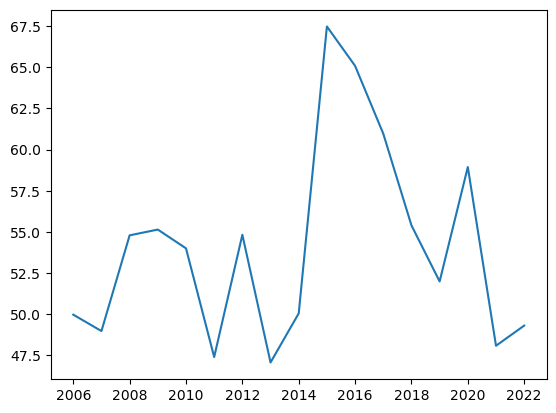

In [36]:
plt.plot( range(2006,2023), res)

In [39]:
res_y_test_boosted = reg.predict(X_test)
reg.score(X,y)

0.8545906093158112

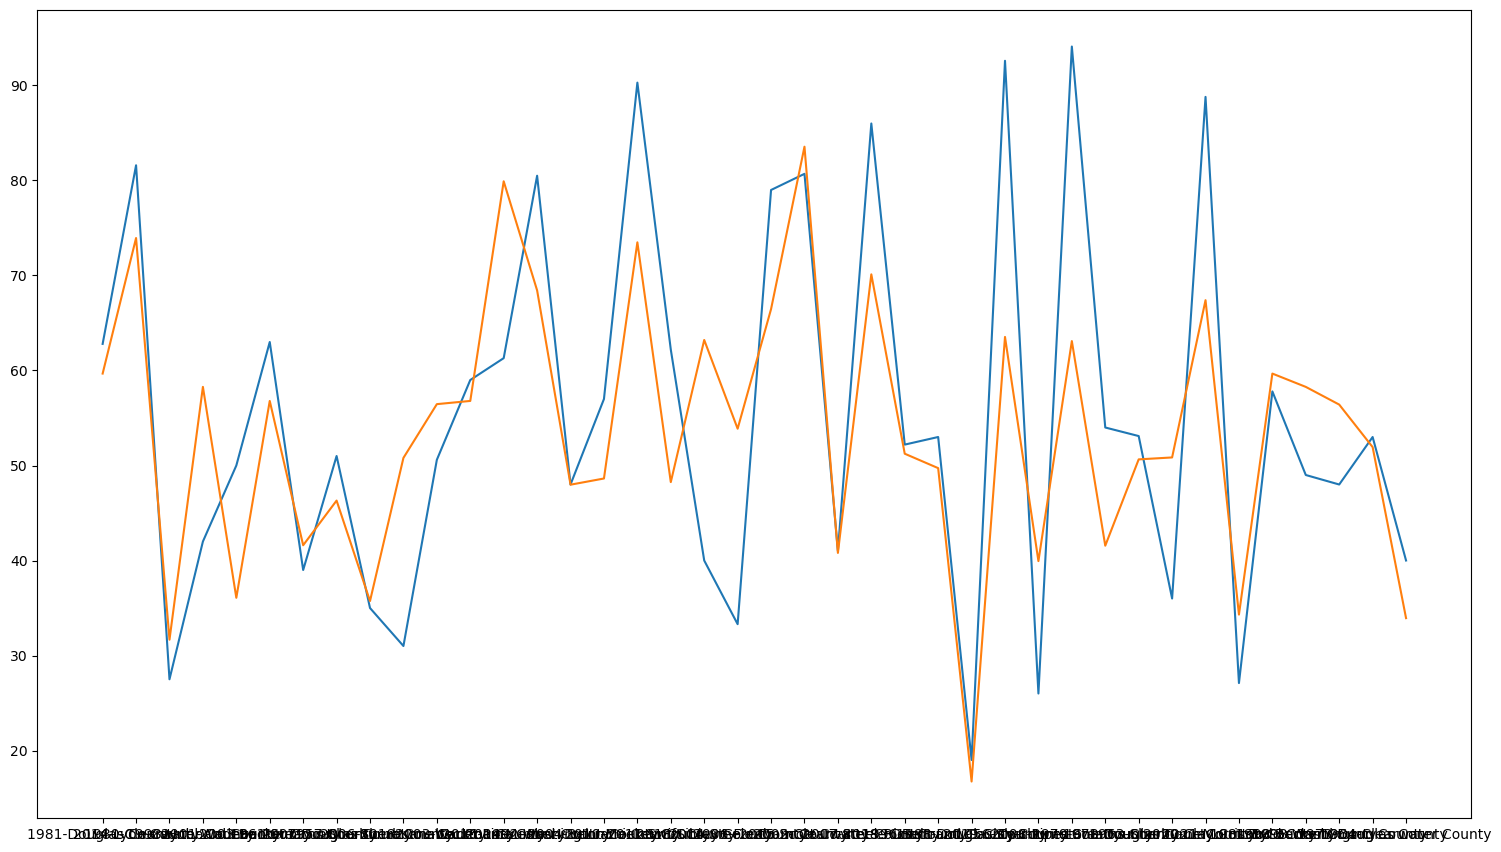

In [40]:
plt.plot(y_test[:40])
plt.plot(res_y_test_boosted[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)